# Vox Chart 11 Redesign

### by Constance McCarney

Chart 11 is comparing the rates of suicide by means of firearms or non-firearms as grouped by states with high or low rates of gun ownership. The argument the graph is making is a little unclear. It shows that suicides by firearms are higher in states with greater gun ownership but, it also seems to be making a statement about suicide rates in general between the two sets of states. So the graph is introducing a confounding variable  by suggesting some characteristic of high gun ownership states that also creates a high suicide rate.

The original data source comes from a table in Miller 2008 that has set values for the different categories. The high gun ownership states are simply defined, based on information from 2001, but no definitions of high and low are given. So from another data source referenced in the Vox article, a study done in 2013 by Kalesan, et al, I've gathered percentages of gun owners in each state. Combining this information with overall suicide rates by means of firearms and and non-firearms in 2013 as gathered from the CDC Wonder tool allows the murkiness of the original graphic to be tested against more recent information and to be clarified.

##  Data

In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

%autosave 0

Populating the interactive namespace from numpy and matplotlib


Autosave disabled


In [4]:
own = pd.read_csv('State Gun Ownership Rate 2013.csv')

In [5]:
own.head()

,State,Year,Ownership Ratio,Population,2001 Low,2001 High
0,Alaska,2013,0.617,735132,0,1
1,Arkansas,2013,0.579,2959373,0,1
2,West Virginia,2013,0.542,1854304,0,1
3,Wyoming,2013,0.538,582658,0,1
4,Montana,2013,0.523,1015165,0,1


In [6]:
deaths = pd.read_csv('CDC_Suicides.csv')

In [7]:
deaths.head()

,State,Year,Population,Fdeaths,FCrude Rate,FAge Adjusted Rate,NFDeaths,NFCrude Rate,NFAge Adjusted Rate
0,Alabama,2001,4467634,387,8.66230,8.56569,125,2.79790,2.81160
1,Alabama,2002,4480089,381,8.50430,8.45582,133,2.96869,3.01729
2,Alabama,2003,4503491,399,8.85979,8.71749,122,2.70901,2.73791
3,Alabama,2004,4530729,375,8.27681,8.02271,166,3.66387,3.71584
4,Alabama,2005,4569805,369,8.07474,7.84921,166,3.63254,3.68095


In [8]:
deaths13 = deaths[(deaths.Year == 2013)]

In [9]:
df = deaths13.merge(own, how='left').drop(['2001 Low','2001 High'], axis = 1)

In [10]:
df.head()

,State,Year,Population,Fdeaths,FCrude Rate,FAge Adjusted Rate,NFDeaths,NFCrude Rate,NFAge Adjusted Rate,Ownership Ratio
0,Alabama,2013,4833722,504,10.42675,9.89351,217,4.48929,4.50262,0.489
1,Alaska,2013,735132,120,16.32360,16.71218,51,6.93753,6.40722,0.617
2,Arizona,2013,6626624,655,9.88437,9.73540,508,7.66605,7.78321,0.323
3,Arkansas,2013,2959373,322,10.88068,10.58134,194,6.55544,6.75966,0.579
4,California,2013,38332521,1571,4.09835,3.97364,2454,6.40187,6.23460,0.201


##  New Visuals

So by plotting Firearm suicide rate per 100,000 against the percent of gun owners in each state, we clearly see the relationship between percentage of gun owners, (and by extension prevalence of guns) and suicides by firearms. High gun ownership states have high gun suicide rates, whereas low gun ownership states have lower suicide by firearms rates.
But what if this were simply explained by higher suicide rates overall in these high gun ownership states? The second graph plots the Non-Firarm suicide rate per 100,000 against the percent of gun owners in each state. The regression line here is flat, demonstrating no particular relationship between suicides without firearms and the rate of gun ownership. So here we have more clearly demonstrated, as opposed to the original graph, that high firearm suicide rates are connected to gun ownership.
Future graph iterations will better combine these plots so the comparisons are easier to make.

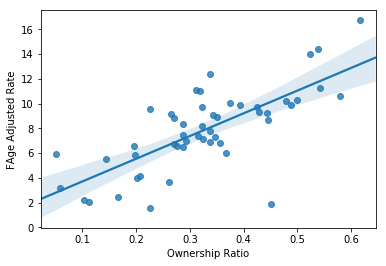

In [13]:
sns.regplot(x='Ownership Ratio', y='FAge Adjusted Rate', data=df)

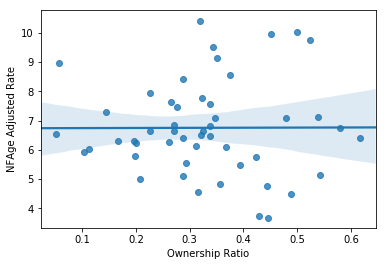

In [12]:
sns.regplot(x='Ownership Ratio', y='NFAge Adjusted Rate', data=df)

##  References

CDC National Center for Health Statistics (NCHS). Underlying Cause of Death 1999-2016. Saved request: https://wonder.cdc.gov/controller/saved/D76/D35F901

Kalesan B, Villarreal MD, Keyes KM, et al Gun ownership and social gun culture Injury Prevention 2016;22:216-220. http://dx.doi.org/10.1136/injuryprev-2015-041586

Lopez, George. "America’s unique gun violence problem, explained in 17 maps and charts." Vox.com. Accessed May 5, 2018.
https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts

Miller, Matthew, M.D., Sc.D., and David Hemenway, Ph.D. Guns and Suicide in the United States. N Engl J Med 2008; 359:989-991. September 4, 2008. DOI: 10.1056/NEJMp0805923